In [33]:
# Auto-install required packages (silent if already installed)
import sys, subprocess

pkgs = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'scipy',
    'statsmodels',
    'scikit-learn'
]

for p in pkgs:
    try:
        __import__(p if p != 'scikit-learn' else 'sklearn')
    except Exception:
        subprocess.run([sys.executable, '-m', 'pip', 'install', '--quiet', '--disable-pip-version-check', p], check=False)

print('✅ Environment ready (installed if needed):', ', '.join(pkgs))


✅ Environment ready (installed if needed): pandas, numpy, matplotlib, seaborn, scipy, statsmodels, scikit-learn


In [34]:
# Imports and configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print('✅ Imports ready')


✅ Imports ready


In [35]:
# Load data
import os

csv_path = 'data.csv'
assert os.path.exists(csv_path), f'File not found: {csv_path}'

df = pd.read_csv(csv_path)
print('Shape:', df.shape)
print('\nHead:')
display(df.head())

print('\nInfo:')
df_info = df.dtypes.to_frame('dtype')
df_info['non_null'] = df.notna().sum()
df_info['nulls'] = df.isna().sum()
display(df_info)

print('\nMissing values per column:')
print(df.isna().sum())


Shape: (57, 7)

Head:


,Country,Population_millions,GDP_billion_USD,CO2_emissions_tons_per_capita,Energy_consumption_kWh_per_capita,Healthcare_expenditure_percent_GDP,Urbanization_percent
0,Belarus,9.5,63.1,6.4,3250,6.1,79.5
1,Russia,144.1,1829.0,11.9,6500,5.3,74.8
2,Ukraine,41.2,200.1,4.7,2850,7.1,69.5
3,Poland,37.8,679.4,8.1,4100,4.9,60.5
4,Lithuania,2.8,56.5,4.5,3850,6.8,68.1



Info:


,dtype,non_null,nulls
Country,object,57,0
Population_millions,float64,57,0
GDP_billion_USD,float64,57,0
CO2_emissions_tons_per_capita,float64,57,0
Energy_consumption_kWh_per_capita,int64,57,0
Healthcare_expenditure_percent_GDP,float64,57,0
Urbanization_percent,float64,57,0



Missing values per column:
Country                               0
Population_millions                   0
GDP_billion_USD                       0
CO2_emissions_tons_per_capita         0
Energy_consumption_kWh_per_capita     0
Healthcare_expenditure_percent_GDP    0
Urbanization_percent                  0
dtype: int64


## Lab 7 scaffold (from PDF)

Fill in according to `Задание ПЗ 7.pdf`:

1) Problem statement and variables
- Define dependent variable `y` and predictors `x_i` based on the task.
- Describe units and expected signs.

2) Exploratory analysis
- Descriptive stats, correlation matrix and heatmap.
- Factor selection criteria (|r| threshold / domain logic).

3) Model building
- OLS model specification, estimation, equation.
- VIF to check multicollinearity.

4) Significance checks
- t-tests for coefficients, CIs.
- Global F-test and adequacy.

5) Assumption diagnostics
- Residual normality (Shapiro/JB), autocorrelation (Durbin–Watson), residual plots.

6) Quality metrics and visuals
- R², adjusted R², RMSE, MAE; Actual vs Predicted.

7) Interpretation and conclusions
- Economic/statistical interpretation, limitations, recommendations.

8) Optional: Save results to CSV
- Pred/Resid tables and summary.


## 1. Корреляционный анализ и отбор факторов


In [36]:
# Rename columns for analysis
DF = df.rename(columns={
    'Population_millions': 'y_Population',
    'GDP_billion_USD': 'x1_GDP',
    'CO2_emissions_tons_per_capita': 'x2_CO2',
    'Energy_consumption_kWh_per_capita': 'x3_Energy',
    'Healthcare_expenditure_percent_GDP': 'x4_Healthcare',
    'Urbanization_percent': 'x5_Urbanization'
})
num_cols = ['y_Population','x1_GDP','x2_CO2','x3_Energy','x4_Healthcare','x5_Urbanization']
D = DF[num_cols].copy()

D.describe().T


,count,mean,std,min,25%,50%,75%,max
y_Population,57.0,93.889474,261.555343,0.4,6.9,19.1,67.4,1439.3
x1_GDP,57.0,1521.742105,3847.147093,24.2,181.8,396.0,1293.0,23315.1
x2_CO2,57.0,5.908772,3.316586,1.2,3.8,5.0,7.7,15.6
x3_Energy,57.0,6398.245614,7609.474621,750.0,2850.0,4650.0,7300.0,54000.0
x4_Healthcare,57.0,7.770175,2.730448,1.2,6.1,7.8,9.7,17.1
x5_Urbanization,57.0,74.250877,14.750449,35.0,64.2,76.6,85.5,100.0


                 y_Population  x1_GDP  x2_CO2  x3_Energy  x4_Healthcare  \
y_Population            1.000   0.582  -0.041     -0.122         -0.195   
x1_GDP                  0.582   1.000   0.368      0.055          0.364   
x2_CO2                 -0.041   0.368   1.000      0.294          0.351   
x3_Energy              -0.122   0.055   0.294      1.000          0.298   
x4_Healthcare          -0.195   0.364   0.351      0.298          1.000   
x5_Urbanization        -0.339   0.019   0.312      0.369          0.425   

                 x5_Urbanization  
y_Population              -0.339  
x1_GDP                     0.019  
x2_CO2                     0.312  
x3_Energy                  0.369  
x4_Healthcare              0.425  
x5_Urbanization            1.000  


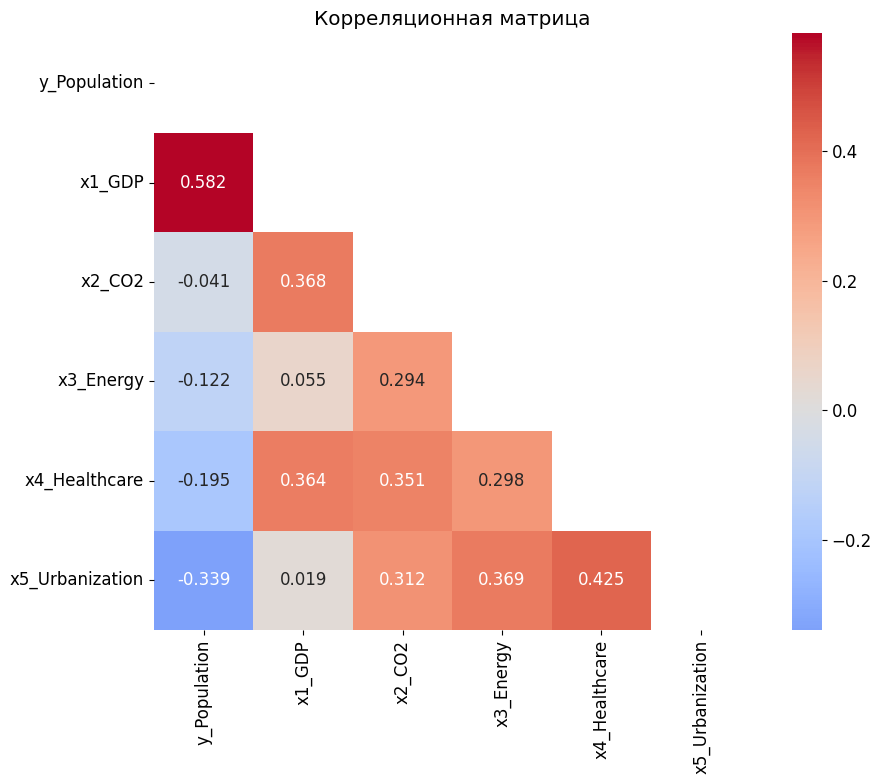

Отобранные факторы: ['x1_GDP', 'x5_Urbanization']


In [37]:
# Correlation matrix and heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = D.corr()
print(corr.round(3))
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, mask=mask, fmt='.3f')
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

# Select factors by |r|>=0.3 with y
threshold = 0.3
y_corr = corr['y_Population'].drop('y_Population')
relevant_factors = [v for v,r in y_corr.items() if abs(r) >= threshold]
print('Отобранные факторы:', relevant_factors)


In [38]:
# VIF for selected factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

if len(relevant_factors) == 0:
    print('Нет факторов по критерию корреляции; используем все, кроме y')
    relevant_factors = [c for c in D.columns if c != 'y_Population']

X_vif = D[relevant_factors]
vif_df = pd.DataFrame({
    'Фактор': relevant_factors,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_df)

# Keep VIF<10
relevant_factors = vif_df.loc[vif_df['VIF'] < 10, 'Фактор'].tolist()
print('Факторы после VIF:', relevant_factors)


            Фактор       VIF
0           x1_GDP  1.155781
1  x5_Urbanization  1.155781
Факторы после VIF: ['x1_GDP', 'x5_Urbanization']


## 2. Построение МНК-модели и оценка параметров


In [39]:
# Prepare X, y and fit OLS
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t, f

y = D['y_Population'].values
X = D[relevant_factors].values
Xc = sm.add_constant(X)
feature_names = ['const'] + relevant_factors

model = sm.OLS(y, Xc)
res = model.fit()
print(res.summary())

coefs = res.params
print('\nКоэффициенты:')
for n, c in zip(feature_names, coefs):
    print(f'{n:>18}: {c: .6f}')

# Regression equation text
eq = f'y = {coefs[0]:.4f}'
for name, c in zip(relevant_factors, coefs[1:]):
    sign = '+' if c >= 0 else ''
    eq += f' {sign}{c:.4f}*{name}'
print('\nУравнение регрессии:')
print(eq)

# t-tests and CIs
alpha = 0.05
n = len(y)
k = len(relevant_factors)
df_res = n - k - 1
print(f"\nСтепени свободы (остатки): {df_res}")
print('t-tests (α=0.05):')
for name, est, tval, pval in zip(feature_names, res.params, res.tvalues, res.pvalues):
    print(f"{name:<18} est={est: .6f}  t={tval: .4f}  p={pval: .6f}")

print('\nДоверительные интервалы 95%:')
ci = res.conf_int(alpha=alpha)
for name, (lo, hi) in zip(feature_names, ci):
    print(f"{name:<18} [{lo: .6f}, {hi: .6f}]")

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
yp = res.fittedvalues
r2 = res.rsquared
r2_adj = res.rsquared_adj
rmse = float(np.sqrt(mean_squared_error(y, yp)))
mae = float(mean_absolute_error(y, yp))
print(f"\nR2={r2:.6f}, R2_adj={r2_adj:.6f}, RMSE={rmse:.6f}, MAE={mae:.6f}")

# Global F-test
Fobs = res.fvalue
Fp = res.f_pvalue
Fcrit = f.ppf(1-alpha, k, df_res)
print(f"Fobs={Fobs:.6f}, Fcrit={Fcrit:.6f}, p={Fp:.8f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     23.19
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           5.38e-08
Time:                        12:18:08   Log-Likelihood:                -380.01
No. Observations:                  57   AIC:                             766.0
Df Residuals:                      54   BIC:                             772.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        494.5411    134.167      3.686      0.0

## 3. Диагностика остатков и визуализация


Residuals mean: 1.2428265044786314e-13
Residuals std: 190.15581857317827
Shapiro–Wilk: W=0.692700, p=0.000000
Jarque–Bera: JB=440.853890, p=0.000000, skew=2.416, kurt=15.739
Durbin–Watson: 1.256659


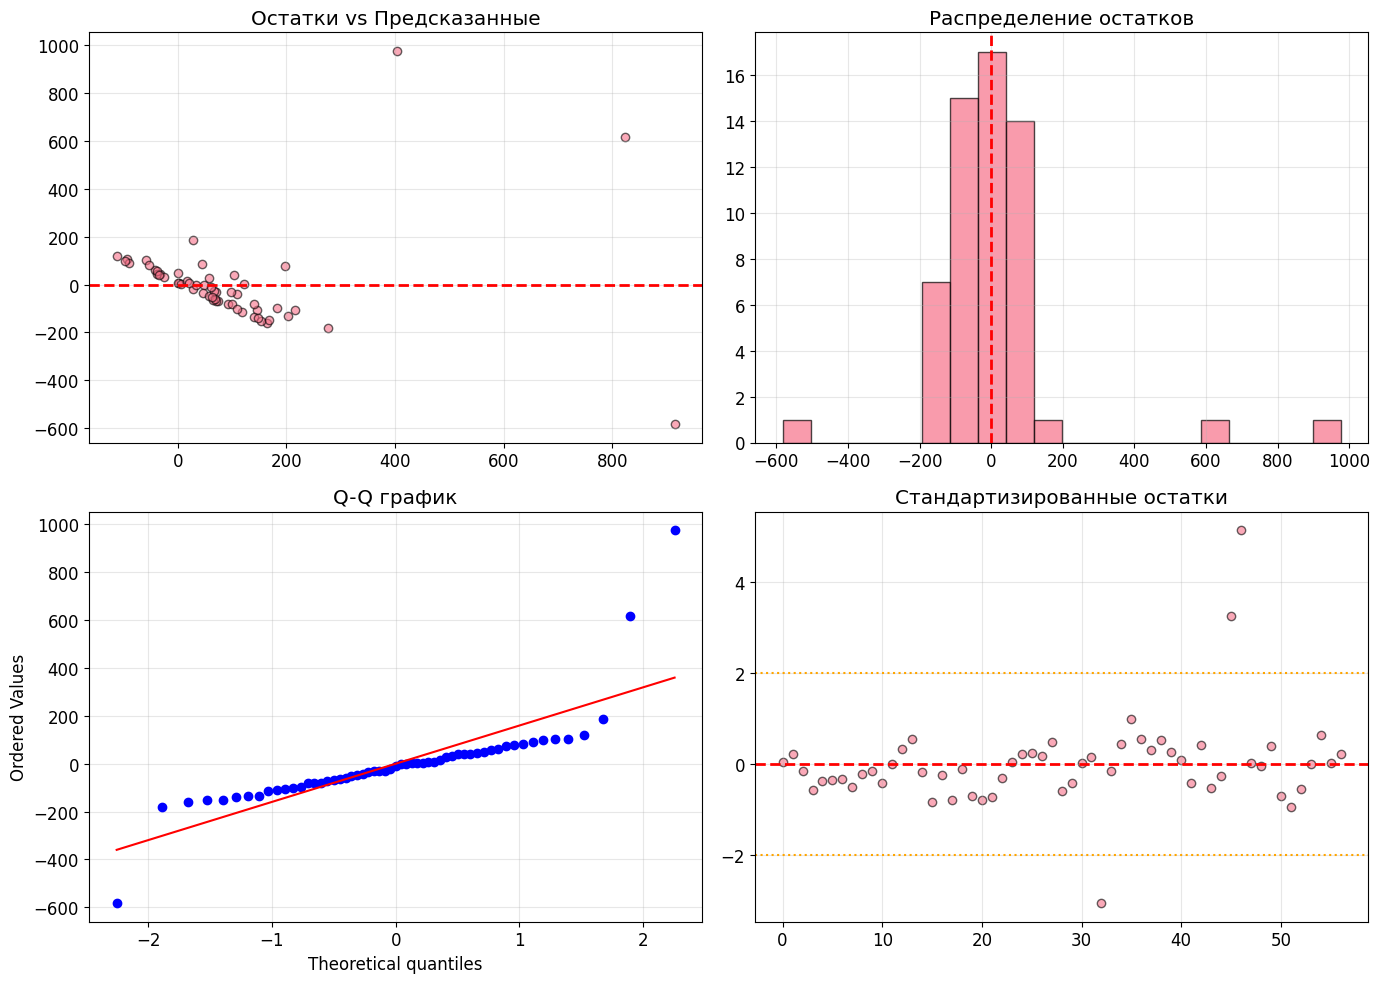

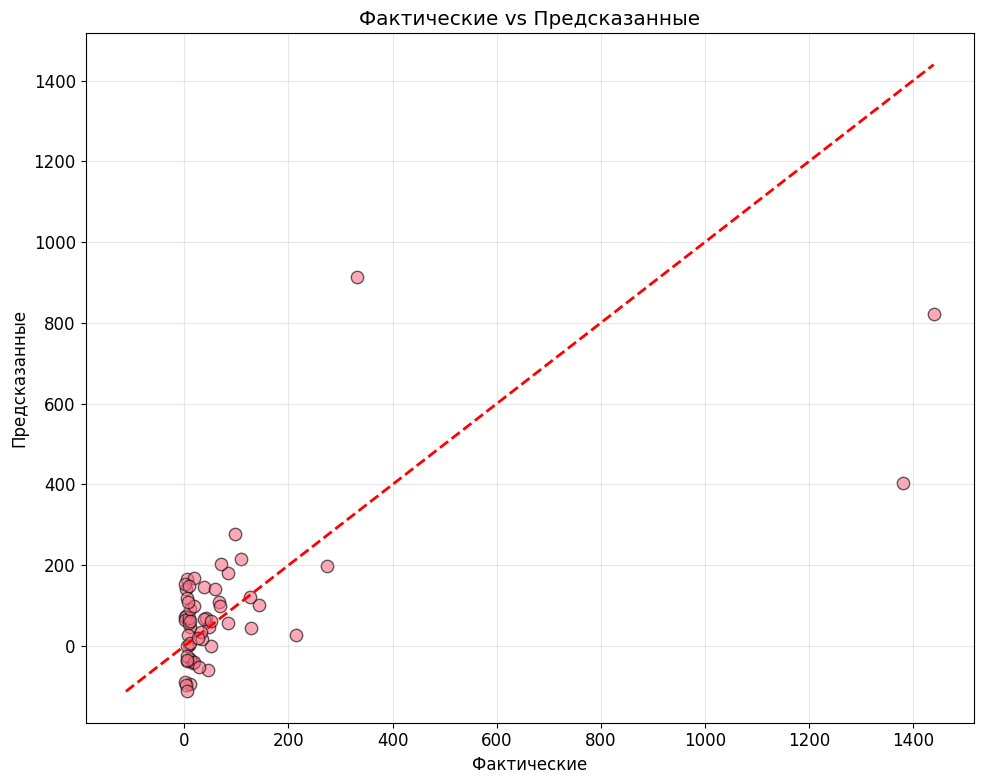

In [40]:
# Residuals, normality, DW, plots
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from scipy.stats import shapiro

resid = res.resid
std_resid = (resid - resid.mean())/resid.std()

print('Residuals mean:', float(resid.mean()))
print('Residuals std:', float(resid.std()))

W, p_sh = shapiro(resid)
print(f'Shapiro–Wilk: W={W:.6f}, p={p_sh:.6f}')
JB_stat, JB_p, skew, kurt = jarque_bera(resid)
print(f'Jarque–Bera: JB={JB_stat:.6f}, p={JB_p:.6f}, skew={skew:.3f}, kurt={kurt:.3f}')

DW = durbin_watson(resid)
print(f'Durbin–Watson: {DW:.6f}')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# yhat vs residuals
axes[0,0].scatter(yp, resid, alpha=0.6, edgecolors='k')
axes[0,0].axhline(0, color='r', linestyle='--', linewidth=2)
axes[0,0].set_title('Остатки vs Предсказанные')
axes[0,0].grid(True, alpha=0.3)

# histogram
axes[0,1].hist(resid, bins=20, edgecolor='black', alpha=0.7)
axes[0,1].axvline(0, color='r', linestyle='--', linewidth=2)
axes[0,1].set_title('Распределение остатков')
axes[0,1].grid(True, alpha=0.3)

# QQ-plot
stats.probplot(resid, dist='norm', plot=axes[1,0])
axes[1,0].set_title('Q-Q график')
axes[1,0].grid(True, alpha=0.3)

# standardized residuals by index
axes[1,1].scatter(range(len(std_resid)), std_resid, alpha=0.6, edgecolors='k')
axes[1,1].axhline(0, color='r', linestyle='--', linewidth=2)
axes[1,1].axhline(2, color='orange', linestyle=':', linewidth=1.5)
axes[1,1].axhline(-2, color='orange', linestyle=':', linewidth=1.5)
axes[1,1].set_title('Стандартизированные остатки')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(10,8))
plt.scatter(y, yp, alpha=0.6, s=80, edgecolors='k')
lims = [min(y.min(), yp.min()), max(y.max(), yp.max())]
plt.plot(lims, lims, 'r--', lw=2)
plt.xlabel('Фактические')
plt.ylabel('Предсказанные')
plt.title('Фактические vs Предсказанные')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Сводные таблицы и экспорт (опционально)


In [41]:
# Build summary DataFrame and save CSVs
summary_df = pd.DataFrame({
    'Параметр': feature_names,
    'Коэффициент': res.params,
    'Ст. ошибка': res.bse,
    't-статистика': res.tvalues,
    'p-value': res.pvalues
})
ci95 = res.conf_int(alpha=0.05)
summary_df['Нижняя 95%'] = ci95[:,0]
summary_df['Верхняя 95%'] = ci95[:,1]

display(summary_df)

out_df = pd.DataFrame({
    'Actual': y,
    'Predicted': yp,
    'Residuals': resid
})
for fcol in relevant_factors:
    out_df[fcol] = D[fcol].values

summary_df.to_csv('lab7_regression_summary.csv', index=False)
out_df.to_csv('lab7_regression_results.csv', index=False)
print("Saved: lab7_regression_summary.csv, lab7_regression_results.csv")


,Параметр,Коэффициент,Ст. ошибка,t-статистика,p-value,Нижняя 95%,Верхняя 95%
0,const,494.541119,134.166892,3.686015,5.293069e-04,225.552697,763.529541
1,x1_GDP,0.040053,0.006787,5.901158,2.455293e-07,0.026445,0.053661
2,x5_Urbanization,-6.216790,1.770240,-3.511835,9.075062e-04,-9.765907,-2.667672


Saved: lab7_regression_summary.csv, lab7_regression_results.csv


## 5. Простая линейная регрессия и ANOVA (в стиле lab5)


Main factor for simple regression: x1_GDP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     28.22
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           2.01e-06
Time:                        12:18:09   Log-Likelihood:                -385.87
No. Observations:                  57   AIC:                             775.7
Df Residuals:                      55   BIC:                             779.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

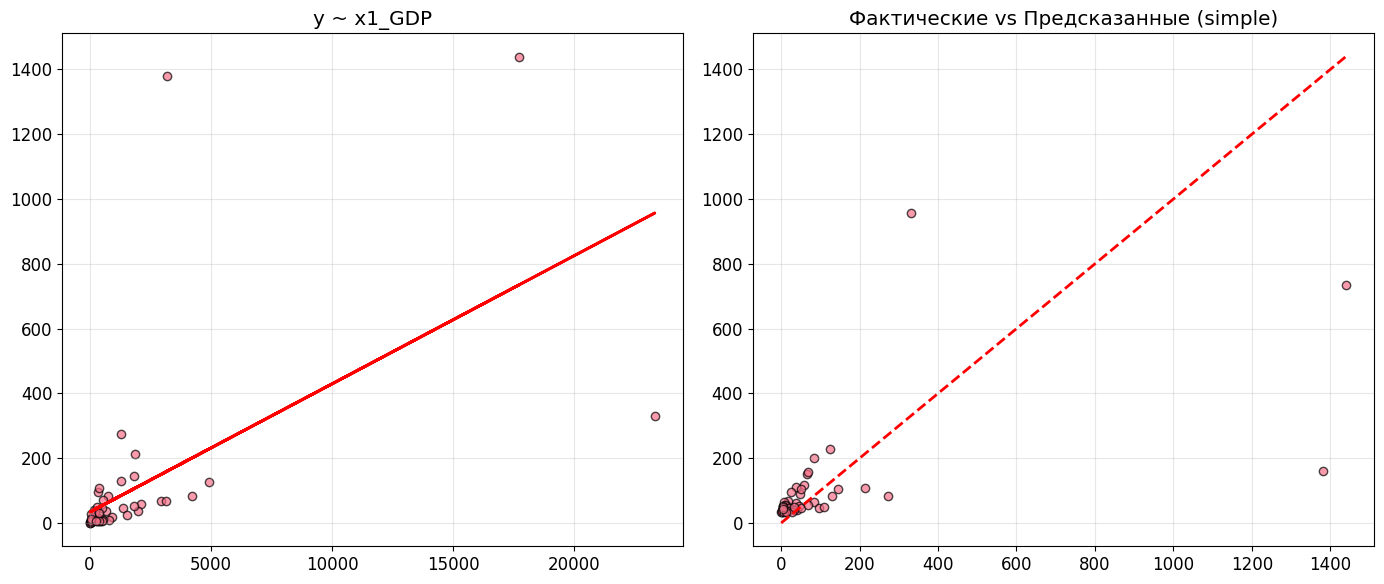

In [42]:
# Simple regression using top-correlated factor with y
# Choose the strongest |corr| with y
corr_with_y = D.corr()['y_Population'].drop('y_Population').abs().sort_values(ascending=False)
main_factor = corr_with_y.index[0]
print('Main factor for simple regression:', main_factor)

X_s = D[[main_factor]].values
Xc_s = sm.add_constant(X_s)
y_s = y
res_s = sm.OLS(y_s, Xc_s).fit()
print(res_s.summary())

# ANOVA and Fisher test
from scipy.stats import f as f_dist
n_s = len(y_s); k_s = 1; df_res_s = n_s - k_s - 1
yp_s = res_s.fittedvalues
SST = float(np.sum((y_s - y_s.mean())**2))
SSR = float(np.sum((yp_s - y_s.mean())**2))
SSE = float(np.sum((y_s - yp_s)**2))
MSR = SSR / k_s
MSE = SSE / df_res_s
F_calc = MSR / MSE
F_crit = f_dist.ppf(1-0.05, k_s, df_res_s)
p_val = 1 - f_dist.cdf(F_calc, k_s, df_res_s)

print('\nANOVA:')
print(f'SSR={SSR:.4f}, SSE={SSE:.4f}, SST={SST:.4f} (check: {abs(SST-(SSR+SSE)):.6f})')
print(f'MSR={MSR:.4f}, MSE={MSE:.4f}, F={F_calc:.6f}, Fcrit={F_crit:.6f}, p={p_val:.8f}')

# Visuals
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X_s, y_s, alpha=0.7, edgecolors='k')
axes[0].plot(X_s, yp_s, 'r-', lw=2)
axes[0].set_title(f'y ~ {main_factor}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_s, yp_s, alpha=0.7, edgecolors='k')
lims = [min(y_s.min(), yp_s.min()), max(y_s.max(), yp_s.max())]
axes[1].plot(lims, lims, 'r--', lw=2)
axes[1].set_title('Фактические vs Предсказанные (simple)')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Проверка точности и целостности данных


In [43]:
# Data validation checks
import numpy as np

issues = []

# 1) Basic schema
expected_cols = ['Country','Population_millions','GDP_billion_USD','CO2_emissions_tons_per_capita',
                 'Energy_consumption_kWh_per_capita','Healthcare_expenditure_percent_GDP','Urbanization_percent']
missing_cols = [c for c in expected_cols if c not in df.columns]
if missing_cols:
    issues.append(f"Missing columns: {missing_cols}")

# 2) Dtypes
numeric_cols = expected_cols[1:]
for c in numeric_cols:
    if c in df.columns and not np.issubdtype(df[c].dtype, np.number):
        issues.append(f"Column {c} should be numeric, got {df[c].dtype}")

# 3) Ranges (domain checks)
if 'Population_millions' in df:
    if (df['Population_millions'] <= 0).any():
        issues.append('Population_millions: non-positive values detected')
    if df['Population_millions'].max() > 1500:
        issues.append('Population_millions: unusually large value (>1500M)')

if 'GDP_billion_USD' in df:
    if (df['GDP_billion_USD'] <= 0).any():
        issues.append('GDP_billion_USD: non-positive values detected')
    if df['GDP_billion_USD'].max() > 30000:
        issues.append('GDP_billion_USD: unusually large value (>30,000B)')

if 'CO2_emissions_tons_per_capita' in df:
    if (df['CO2_emissions_tons_per_capita'] < 0).any():
        issues.append('CO2_emissions_tons_per_capita: negative values detected')
    if df['CO2_emissions_tons_per_capita'].max() > 50:
        issues.append('CO2_emissions_tons_per_capita: unusually large value (>50)')

if 'Energy_consumption_kWh_per_capita' in df:
    if (df['Energy_consumption_kWh_per_capita'] <= 0).any():
        issues.append('Energy_consumption_kWh_per_capita: non-positive values detected')
    if df['Energy_consumption_kWh_per_capita'].max() > 60000:
        issues.append('Energy_consumption_kWh_per_capita: unusually large value (>60000)')

if 'Healthcare_expenditure_percent_GDP' in df:
    if (df['Healthcare_expenditure_percent_GDP'] <= 0).any():
        issues.append('Healthcare_expenditure_percent_GDP: non-positive % detected')
    if df['Healthcare_expenditure_percent_GDP'].max() > 30:
        issues.append('Healthcare_expenditure_percent_GDP: unusually large % (>30)')

if 'Urbanization_percent' in df:
    if (df['Urbanization_percent'] < 0).any() or (df['Urbanization_percent'] > 100).any():
        issues.append('Urbanization_percent: values outside [0, 100]')

# 4) Missing values
na_counts = df.isna().sum()
if na_counts.any():
    issues.append(f"Missing values detected: {na_counts[na_counts>0].to_dict()}")

# 5) Duplicate countries
if 'Country' in df:
    dups = df['Country'].duplicated().sum()
    if dups > 0:
        issues.append(f'Duplicate country rows: {dups}')

# Report
print('Data validation report:')
if issues:
    for i, msg in enumerate(issues, 1):
        print(f"{i}) {msg}")
else:
    print('No issues found')

# Quick outlier flag by z-score for numeric cols
z_flags = {}
for c in numeric_cols:
    if c in df:
        vals = df[c].astype(float)
        z = (vals - vals.mean())/vals.std(ddof=1)
        z_flags[c] = int((np.abs(z) > 3).sum())
print('\nPotential outliers (>3σ) per column:', z_flags)


Data validation report:
No issues found

Potential outliers (>3σ) per column: {'Population_millions': 2, 'GDP_billion_USD': 2, 'CO2_emissions_tons_per_capita': 0, 'Energy_consumption_kWh_per_capita': 1, 'Healthcare_expenditure_percent_GDP': 1, 'Urbanization_percent': 0}


## 7. Построчные комментарии к ключевым ячейкам

### 0. Установка зависимостей
```python
# Перечисляем пакеты, требуемые в работе
pkgs = ['pandas','numpy','matplotlib','seaborn','scipy','statsmodels','scikit-learn']

# Идем по каждому пакету
for p in pkgs:
    try:
        # Пытаемся импортировать (для scikit-learn импортируем как sklearn)
        __import__(p if p != 'scikit-learn' else 'sklearn')
    except Exception:
        # Если не установлен — тихо устанавливаем через pip
        subprocess.run([sys.executable, '-m', 'pip', 'install', '--quiet', '--disable-pip-version-check', p], check=False)

# Сообщение об успешной готовности окружения
print('✅ Environment ready (installed if needed):', ', '.join(pkgs))
```

### 1. Импорты и конфигурация графиков
```python
# Табличные данные и численные вычисления
import pandas as pd
import numpy as np

# Базовые и расширенные визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Статистические функции
from scipy import stats

# Пакет для регрессионного анализа и статистики
import statsmodels.api as sm

# Алгоритмы и метрики из scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Подавление предупреждений для чистоты вывода
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля визуализаций
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Проверочный принт
print('✅ Imports ready')
```

### 2. Загрузка и первичный осмотр данных
```python
# Путь к файлу
csv_path = 'data.csv'

# Проверяем, что файл существует
assert os.path.exists(csv_path), f'File not found: {csv_path}'

# Читаем CSV в DataFrame
df = pd.read_csv(csv_path)

# Печатаем размерность таблицы
print('Shape:', df.shape)

# Показываем первые строки
print('\nHead:')
display(df.head())

# Сводная информация по типам и пропускам
print('\nInfo:')
df_info = df.dtypes.to_frame('dtype')
df_info['non_null'] = df.notna().sum()
df_info['nulls'] = df.isna().sum()
display(df_info)

# Итог по пропущенным значениям в столбцах
print('\nMissing values per column:')
print(df.isna().sum())
```

### 3. Переименование столбцов и описательная статистика
```python
# Переименовываем столбцы под удобные имена для анализа
DF = df.rename(columns={
    'Population_millions': 'y_Population',
    'GDP_billion_USD': 'x1_GDP',
    'CO2_emissions_tons_per_capita': 'x2_CO2',
    'Energy_consumption_kWh_per_capita': 'x3_Energy',
    'Healthcare_expenditure_percent_GDP': 'x4_Healthcare',
    'Urbanization_percent': 'x5_Urbanization'
})

# Отбираем числовые колонки
num_cols = ['y_Population','x1_GDP','x2_CO2','x3_Energy','x4_Healthcare','x5_Urbanization']
D = DF[num_cols].copy()

# Печатаем описательную статистику
D.describe().T
```

### 4. Корреляции и отбор факторов, VIF
```python
# Корреляционная матрица
corr = D.corr()
print(corr.round(3))

# Маска верхнего треугольника для аккуратной отрисовки
mask = np.triu(np.ones_like(corr, dtype=bool))

# Тепловая карта корреляций
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, mask=mask, fmt='.3f')
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

# Отбираем факторы по порогу |r|>=0.3 относительно целевой переменной
threshold = 0.3
y_corr = corr['y_Population'].drop('y_Population')
relevant_factors = [v for v, r in y_corr.items() if abs(r) >= threshold]
print('Отобранные факторы:', relevant_factors)

# Если факторов нет — используем все кроме y
if len(relevant_factors) == 0:
    relevant_factors = [c for c in D.columns if c != 'y_Population']

# Расчёт VIF для проверки мультиколлинеарности
X_vif = D[relevant_factors]
vif_df = pd.DataFrame({
    'Фактор': relevant_factors,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_df)

# Оставляем факторы с VIF<10
relevant_factors = vif_df.loc[vif_df['VIF'] < 10, 'Фактор'].tolist()
print('Факторы после VIF:', relevant_factors)
```

### 5. Построение МНК-модели и метрики
```python
# Формируем X и y
y = D['y_Population'].values
X = D[relevant_factors].values

# Добавляем константу к регрессорам
Xc = sm.add_constant(X)

# Имена параметров (const + факторы)
feature_names = ['const'] + relevant_factors

# Строим OLS-модель и обучаем
model = sm.OLS(y, Xc)
res = model.fit()

# Печатаем сводку результатов
print(res.summary())

# Извлекаем оценки коэффициентов
coefs = res.params
print('\nКоэффициенты:')
for n, c in zip(feature_names, coefs):
    print(f'{n:>18}: {c: .6f}')

# Формируем текст уравнения регрессии
eq = f'y = {coefs[0]:.4f}'
for name, c in zip(relevant_factors, coefs[1:]):
    sign = '+' if c >= 0 else ''
    eq += f' {sign}{c:.4f}*{name}'
print('\nУравнение регрессии:')
print(eq)

# Гипотезы для t-критерия и ДИ
alpha = 0.05
n = len(y)
k = len(relevant_factors)
df_res = n - k - 1
print(f"\nСтепени свободы (остатки): {df_res}")
print('t-tests (α=0.05):')
for name, est, tval, pval in zip(feature_names, res.params, res.tvalues, res.pvalues):
    print(f"{name:<18} est={est: .6f}  t={tval: .4f}  p={pval: .6f}")

# 95%-доверительные интервалы
ci = res.conf_int(alpha=alpha)
for name, (lo, hi) in zip(feature_names, ci):
    print(f"{name:<18} [{lo: .6f}, {hi: .6f}]")

# Метрики качества
yp = res.fittedvalues
r2 = res.rsquared
r2_adj = res.rsquared_adj
rmse = float(np.sqrt(mean_squared_error(y, yp)))
mae = float(mean_absolute_error(y, yp))
print(f"\nR2={r2:.6f}, R2_adj={r2_adj:.6f}, RMSE={rmse:.6f}, MAE={mae:.6f}")

# Глобальная значимость (F-тест)
Fobs = res.fvalue
Fp = res.f_pvalue
Fcrit = f.ppf(1-alpha, k, df_res)
print(f"Fobs={Fobs:.6f}, Fcrit={Fcrit:.6f}, p={Fp:.8f}")
```

### 6. Диагностика остатков
```python
# Остатки и стандартизованные остатки
resid = res.resid
std_resid = (resid - resid.mean())/resid.std()

# Нормальность остатков (Шапиро, Джарке–Бера)
W, p_sh = shapiro(resid)
JB_stat, JB_p, skew, kurt = jarque_bera(resid)

# Автокорреляция остатков (Дарбин–Уотсон)
DW = durbin_watson(resid)

# Диагностические графики (остатки vs прогнозы, гистограмма, QQ, стандартизованные остатки)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0,0].scatter(yp, resid, alpha=0.6, edgecolors='k'); axes[0,0].axhline(0, color='r', linestyle='--', linewidth=2)
axes[0,1].hist(resid, bins=20, edgecolor='black', alpha=0.7); axes[0,1].axvline(0, color='r', linestyle='--', linewidth=2)
stats.probplot(resid, dist='norm', plot=axes[1,0])
axes[1,1].scatter(range(len(std_resid)), std_resid, alpha=0.6, edgecolors='k')
axes[1,1].axhline(0, color='r', linestyle='--', linewidth=2); axes[1,1].axhline(2, color='orange', linestyle=':', linewidth=1.5); axes[1,1].axhline(-2, color='orange', linestyle=':', linewidth=1.5)
plt.tight_layout(); plt.show()

# Фактические vs Предсказанные
plt.figure(figsize=(10,8))
plt.scatter(y, yp, alpha=0.6, s=80, edgecolors='k')
lims = [min(y.min(), yp.min()), max(y.max(), yp.max())]
plt.plot(lims, lims, 'r--', lw=2)
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()
```

### 7. Экспорт результатов
```python
# Таблица параметров и доверительных интервалов
summary_df = pd.DataFrame({
    'Параметр': feature_names,
    'Коэффициент': res.params,
    'Ст. ошибка': res.bse,
    't-статистика': res.tvalues,
    'p-value': res.pvalues
})
ci95 = res.conf_int(alpha=0.05)
summary_df['Нижняя 95%'] = ci95[:,0]
summary_df['Верхняя 95%'] = ci95[:,1]

# Таблица фактических/прогнозных/остатков
out_df = pd.DataFrame({'Actual': y,'Predicted': yp,'Residuals': resid})
for fcol in relevant_factors:
    out_df[fcol] = D[fcol].values

# Сохранение CSV
summary_df.to_csv('lab7_regression_summary.csv', index=False)
out_df.to_csv('lab7_regression_results.csv', index=False)
```

### 8. Простая регрессия и ANOVA (lab5)
```python
# Выбираем фактор с максимальной |corr| с y
corr_with_y = D.corr()['y_Population'].drop('y_Population').abs().sort_values(ascending=False)
main_factor = corr_with_y.index[0]

# Обучаем простую линейную регрессию y ~ main_factor
X_s = D[[main_factor]].values
Xc_s = sm.add_constant(X_s)
y_s = y
res_s = sm.OLS(y_s, Xc_s).fit()

# ANOVA вручную
yp_s = res_s.fittedvalues
SST = float(np.sum((y_s - y_s.mean())**2))
SSR = float(np.sum((yp_s - y_s.mean())**2))
SSE = float(np.sum((y_s - yp_s)**2))
MSR = SSR / 1
MSE = SSE / (len(y_s) - 2)
F_calc = MSR / MSE
F_crit = f_dist.ppf(1-0.05, 1, len(y_s)-2)
p_val = 1 - f_dist.cdf(F_calc, 1, len(y_s)-2)

# Визуализации: регрессионная линия и фактические vs предсказанные
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X_s, y_s, alpha=0.7, edgecolors='k'); axes[0].plot(X_s, yp_s, 'r-', lw=2)
axes[1].scatter(y_s, yp_s, alpha=0.7, edgecolors='k')
lims = [min(y_s.min(), yp_s.min()), max(y_s.max(), yp_s.max())]
axes[1].plot(lims, lims, 'r--', lw=2)
plt.tight_layout(); plt.show()
```

